In [ ]:
from sympy import *
import numpy as np
from scipy import linalg
init_printing()
import matplotlib.pyplot as plt

In [ ]:
# initialize system

g = 9.81

# Mass and moment of inertia of the bus
m = 0.5264    # The mass of the quadrotor in kg
Ixx = 0.0011990275915  # The moment of inertia of the quadrotor in
Iyy = 0.0011990275915  # The mass of the quadrotor in kg
Izz = 0.000515549122333  # The mass of the quadrotor in kg
lxy = 0.25    # The x or y distance from the quadrotor frame to the mocap markers in meters
lz = 0.046875 # The z distance from the quadrotor frame to the mocap markers in meters
Iprop = 0.00000510751666667

# drone properties

k = 1.5 * 10**-9
Larm = 0.10 #m

omega_m_eq = 29337.0755188720

p_x_e = 0
p_y_e = 0
p_z_e = 0
v_x_e = 0
v_y_e = 0
v_z_e = 0
phi_e = 0
theta_e = 0
psi_e = 0
omega_x_e = 0
omega_y_e = 0
omega_z_e = 0

omega1,omega2,omega3,omega4 = symbols('omega1,omega2,omega3,omega4')

tau_x_eq = 0
tau_y_eq = 0
tau_z_eq = 0
f_z_eq = m*9.81

tau_x_exp = k*(omega4**2-omega2**2)*Larm*sin(45)
tau_y_exp = k*(omega3**2+-omega1**2)*Larm*sin(45)
tau_z_exp = 2*Iprop*(omega1**2-omega2**2+omega3**2-omega4**2)
f_z_exp = k*(omega1**2+omega2**2+omega3**2+omega4**2)

m_e = np.array([p_x_e,p_y_e,p_z_e,
             phi_e,theta_e,psi_e,
             v_x_e,v_y_e,v_z_e,
             omega_x_e,omega_y_e,omega_z_e]) # equilibrium state

n_e = np.array([tau_x_eq,tau_y_eq,tau_z_eq,f_z_eq])


A = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 9.81, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, -9.81, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
B = np.array([[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.8996960486322187], [834.009164667334, 0.0, 0.0, 0.0], [0.0, 834.009164667334, 0.0, 0.0], [0.0, 0.0, 1939.67937618578, 0.0]])
K = np.array([[4.435587211786495e-14, -2.2360679774997787, 1.3401926582613883e-14, -2.4435735624435287e-14, 2.583350913751903e-14, 9.314032240854745, 3.1255145487644625e-14, -2.4486805715160624, 4.699366249594955e-15, 0.3497650115289007, 6.054750765243954e-16, 2.315566630417427e-16], [2.2360679774998187, -1.0142593896072878e-14, 3.713841689289151e-16, -5.429710723771213e-15, 9.31403224085465, 1.3955728060129932e-14, 2.4486805715160798, -6.309226602073469e-15, 7.545576543032803e-16, 6.054750765243954e-16, 0.3497650115288979, 1.5872381938975564e-16], [-1.7496913556837234e-14, -2.855246893851847e-14, 4.942002535553229e-14, 8.36660026534082, 5.080021560062136e-14, 1.8114123192651023e-14, -2.273046318830765e-14, -1.6139427983076046e-14, 1.0364038100037225e-14, 5.385380673839738e-16, 3.691486041433955e-16, 0.3295857807118174], [1.0096896735799777e-15, -2.8533698742563314e-15, 2.2360679774997867, -9.266788089449091e-16, 1.3864290208236739e-17, 2.6239371118604783e-15, 7.383992661380918e-16, -1.8462685035169224e-15, 2.025865831369831, 1.0704159946482191e-17, 1.7187223535090264e-18, 1.0150400353913308e-17]])



In [ ]:
# simulate performance requirement 1

# simulation data set
data1 = []
times1 = []
input1 = []

# desired systems state
pos_goal = np.array([0,0,1])

T = 2*60 # simulation duration in seconds
dt = 0.002 # simulation time steps

x_test = np.zeros(12) # initial state
xdes = np.zeros(12)
data1.append([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])

print(x_test)

x_mem = x_test
u_mem = np.array([0,0,0,0])

for i in range(0,70000):
  key = str(i)
  t = i*dt
  times1.append(t)

  pos = x_test[0:3]
  vel = x_test[6:9]
  dist = pos_goal - pos
  u_dist = dist / np.linalg.norm(dist)

  if np.linalg.norm(dist) > 0.1:
       pos_des = pos + 0.01 * u_dist
       vel_des = 0.05 * u_dist
  elif np.linalg.norm(dist) > 0.075:
       pos_des = pos +  0.01 * u_dist
       vel_des = 0.0275 * u_dist
  elif np.linalg.norm(dist) > 0.05:
       pos_des = pos +  0.01 * u_dist
       vel_des = 0.005 * u_dist
  elif np.linalg.norm(dist) > 0.03:
       pos_des = pos +  0.01 * u_dist
       vel_des = 0.003 * u_dist
  elif np.linalg.norm(dist) > 0.01:
       pos_des = pos +  0.01 * u_dist
       vel_des = 0.0007 * u_dist
  else:
       pos_des = pos_goal
       vel_des = 0 * u_dist

  xdes_mem = xdes
  xdes = np.concatenate((pos_des,np.zeros(3),vel_des,np.zeros(3)))

  xdot = A @ x_test - B @ K @ (x_test-xdes)

  x_mem = x_test


  x_test += xdot*dt

  u_now = -K @ (x_test-xdes)
  u_couple = np.concatenate((u_mem,u_now))
  u_mem = u_now

  input1.append(list(u_couple))

  data1.append(list(x_test))



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


''

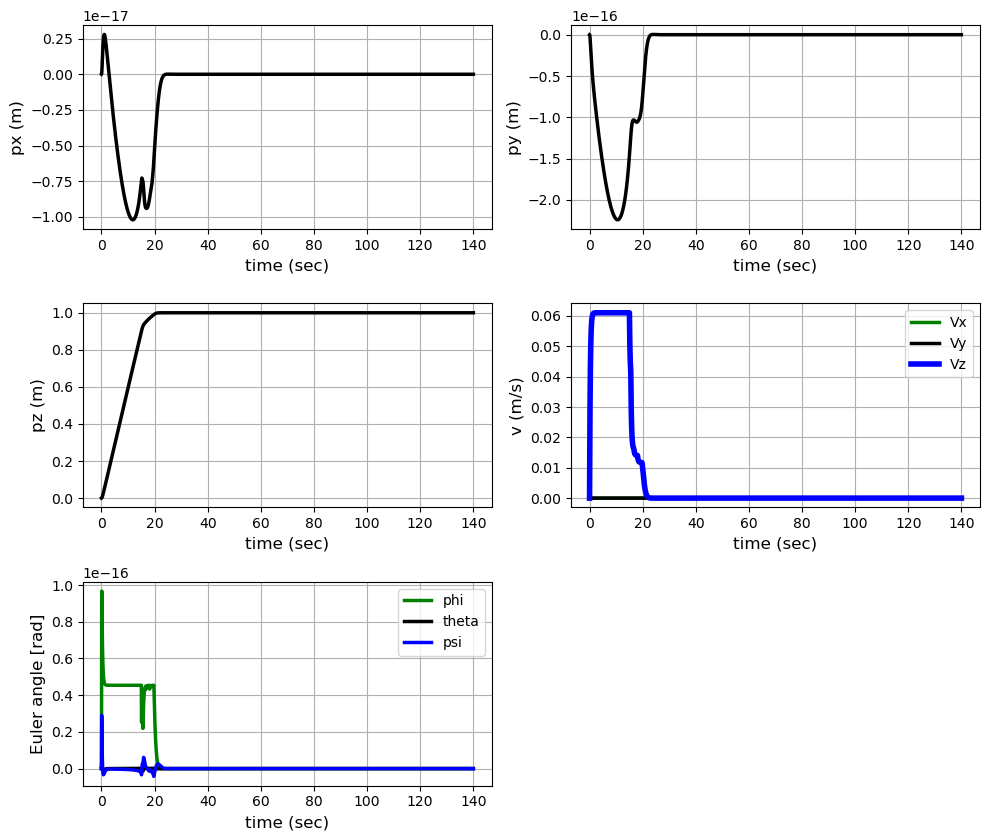

In [ ]:
fig1 = plt.figure(figsize=(10, 8.5),tight_layout = True)

px = []
py = []
pz = []

psi = []
phi = []
theta = []

vx = []
vy = []
vz = []

for i in range(0,len(times1)):
  px.append(data1[i][0])
  py.append(data1[i][1])
  pz.append(data1[i][2])

  psi.append(data1[i][5])
  phi.append(data1[i][3])
  theta.append(data1[i][4])

  vx.append(data1[i][6])
  vy.append(data1[i][7])
  vz.append(data1[i][8])

# Create a plot of position x versus time
ax1 = fig1.add_subplot(321)
ax1.plot(times1, px, c='k', lw=2.5, label="")
ax1.set_xlabel("time (sec)", fontsize=12)
ax1.set_ylabel("px (m)", fontsize=12)
ax1.set_title("", fontsize=14)
ax1.grid()

# Create a plot of position y versus time
ax2 = fig1.add_subplot(322)
ax2.plot(times1, py, c='k', lw=2.5, label="")
ax2.set_xlabel("time (sec)", fontsize=12)
ax2.set_ylabel("py (m)", fontsize=12)
ax2.set_title("", fontsize=14)
ax2.grid()

# Create a plot of position z versus time
ax3 = fig1.add_subplot(323)
ax3.plot(times1, pz, c='k', lw=2.5, label="")
ax3.set_xlabel("time (sec)", fontsize=12)
ax3.set_ylabel("pz (m)", fontsize=12)
ax3.set_title("", fontsize=14)
ax3.grid()

# Create a plot of position x versus time
ax4 = fig1.add_subplot(324)
ax4.set_xlabel("time (sec)", fontsize=12)
ax4.plot(times1, vx, c='g', lw=2.5, label="Vx")
ax4.plot(times1, vy, c='k', lw=2.5, label="Vy")
ax4.plot(times1, vz, c='b', lw=4, label="Vz")
ax4.set_ylabel("v (m/s)", fontsize=12)
ax4.set_title("", fontsize=14)
ax4.legend()
ax4.grid()

# Create a plot of position x versus time
ax5 = fig1.add_subplot(325)
ax5.set_xlabel("time (sec)", fontsize=12)
ax5.plot(times1, phi, c='g', lw=2.5, label="phi")
ax5.plot(times1,theta, c='k', lw=2.5, label="theta")
ax5.plot(times1, psi, c='b', lw=2.5, label="psi")
ax5.set_ylabel("Euler angle [rad]", fontsize=12)
ax5.set_title("", fontsize=14)
ax5.legend()
ax5.grid()

""

In [ ]:
# calculate motor torques

# Don't run this code block or the one below again and again. It takes quite a bit of time to make torque calculations.
# Instead, run the code block below that has the pickle module imported. For that to work, one has to download
# the dictionaries named omega_list and torque_list from github and have them in the same folder as this file.
"""
omega_list = []

omega1,omega2,omega3,omega4 = symbols('omega1,omega2,omega3,omega4')

for i in range(1,10000):
  tau_x_exp = k*(omega3**2-omega1**2)*Larm*sin(np.pi/2)
  tau_y_exp = k*(omega4**2-omega2**2)*Larm*sin(np.pi/2)
  tau_z_exp = 2*Iprop*(omega2**2+omega4**2-omega1**2-omega3**2)
  f_z_exp = k*(omega1**2+omega2**2+omega3**2+omega4**2)

  eq1 = Eq(tau_x_exp, input1[i][0])
  eq2 = Eq(tau_y_exp, input1[i][1])
  eq3 = Eq(tau_z_exp, input1[i][2])
  eq4 = Eq(f_z_exp, input1[i][3])

  sol = solve((eq1,eq2,eq3,eq4),(omega1,omega2,omega3,omega4))

  omegas = np.array([sol[5][0],sol[5][1],sol[5][2],sol[5][3]])

  omega_list.append(omegas)


In [ ]:
"""
torque_list = []

for i in range(0,len(omega_list)-1):
  omega0 = omega_list[i]
  omega1 = omega_list[i+1]
  delta = omega1-omega0
  torque = []
  for w in delta:
    torque.append(w[0]/dt*k)
    torque.append(w[1]/dt*k)
    torque.append(w[2]/dt*k)
    torque.append(w[3]/dt*k)
  torque_list.append(torque)

In [ ]:
import pickle

with open('omega_list.pickle', 'rb') as f:
    omega_list = pickle.load(f)

with open('torque_list.pickle', 'rb') as f:
    torque_list = pickle.load(f)

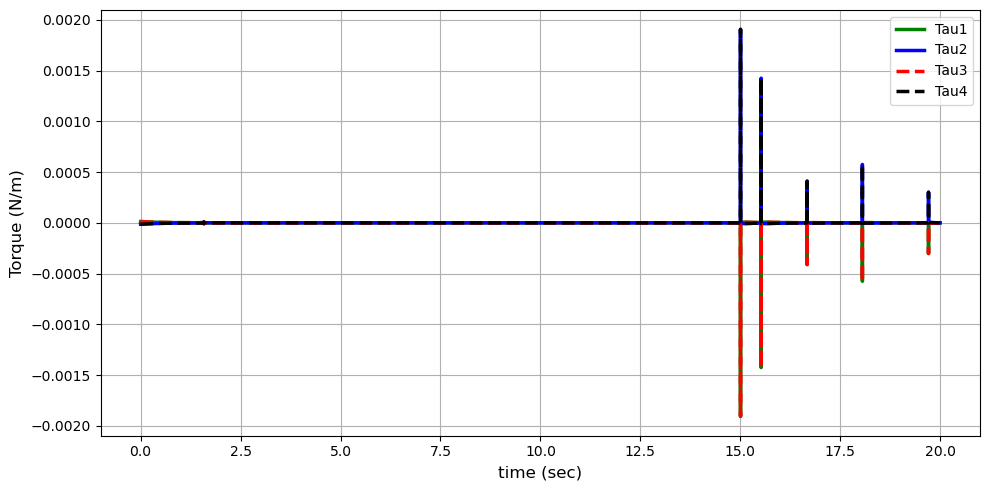

In [ ]:
n = len(torque_list)
times_torque1 = []
tau1 = []
tau2 = []
tau3 = []
tau4 = []
for i in range(0,n):
    times_torque1.append(i*dt)
    tau1.append(re(torque_list[i][0])+im(torque_list[i][0]))
    tau2.append(re(torque_list[i][1])+im(torque_list[i][1]))
    tau3.append(re(torque_list[i][2])+im(torque_list[i][2]))
    tau4.append(re(torque_list[i][3])+im(torque_list[i][3]))

fig1t = plt.figure(figsize=(10, 5),tight_layout = True)

# Create a plot of position x versus time
ax1 = fig1t.add_subplot(111)
ax1.set_xlabel("time (sec)", fontsize=12)
ax1.plot(times_torque1, tau1, 'g-', lw=2.5, label="Tau1")
ax1.plot(times_torque1, tau2, 'b-', lw=2.5, label="Tau2")
ax1.plot(times_torque1, tau3, 'r--', lw=2.5, label="Tau3")
ax1.plot(times_torque1, tau4, 'k--', lw=2.5, label="Tau4")
ax1.set_ylabel("Torque (N/m)", fontsize=12)
ax1.set_title("", fontsize=14)
ax1.legend()
ax1.grid()

In [ ]:
# simulate performance requirement 2

# solve for the equilibrium  state

v_norm = 0.5
r = 2.
w = v_norm/2
alpha = np.pi


x_test = np.array([0,0.,1.,0.,0,0.,0,0.,0.,0.,0.,0.]) # initial state
xdes = np.zeros(12)
data1.append([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])

# simulation data set
data2 = []
times2 = []
input2 = []

T = 60 # simulation duration in seconds
dt = 0.002 # simulation time steps

x_mem = x_test

for i in range(0,35000):
  key = str(i)
  t = i*dt
  times2.append(t)

  pos = x_test[0:3]
  vel = x_test[6:9]

  center = np.array([r,0,1])

  alpha += w * dt
  alpha = alpha % (2*np.pi)

  x_des = center[0]  + r * np.cos(alpha)
  y_des = center[1]  + r * np.sin(alpha)

  pos_des = np.array([ x_des, y_des, 1])

  dist = pos_des - pos
  u_dist = dist / np.linalg.norm(dist)

  pos_des = pos + 0.001 * u_dist
  vel_des = v_norm * u_dist

  xdes_mem = xdes
  xdes = np.concatenate((pos_des,np.zeros(3),vel_des,np.zeros(3)))


  xdot = A @ x_test - B @ K @ (x_test-xdes)

  x_mem = x_test
  x_test += xdot*dt

  u_prev = -K @ (x_mem-xdes_mem)
  u_next = -K @ (x_test-xdes)

  u_couple = np.concatenate((u_prev,u_next))
  input2.append(list(u_couple))

  data2.append(list(x_test))


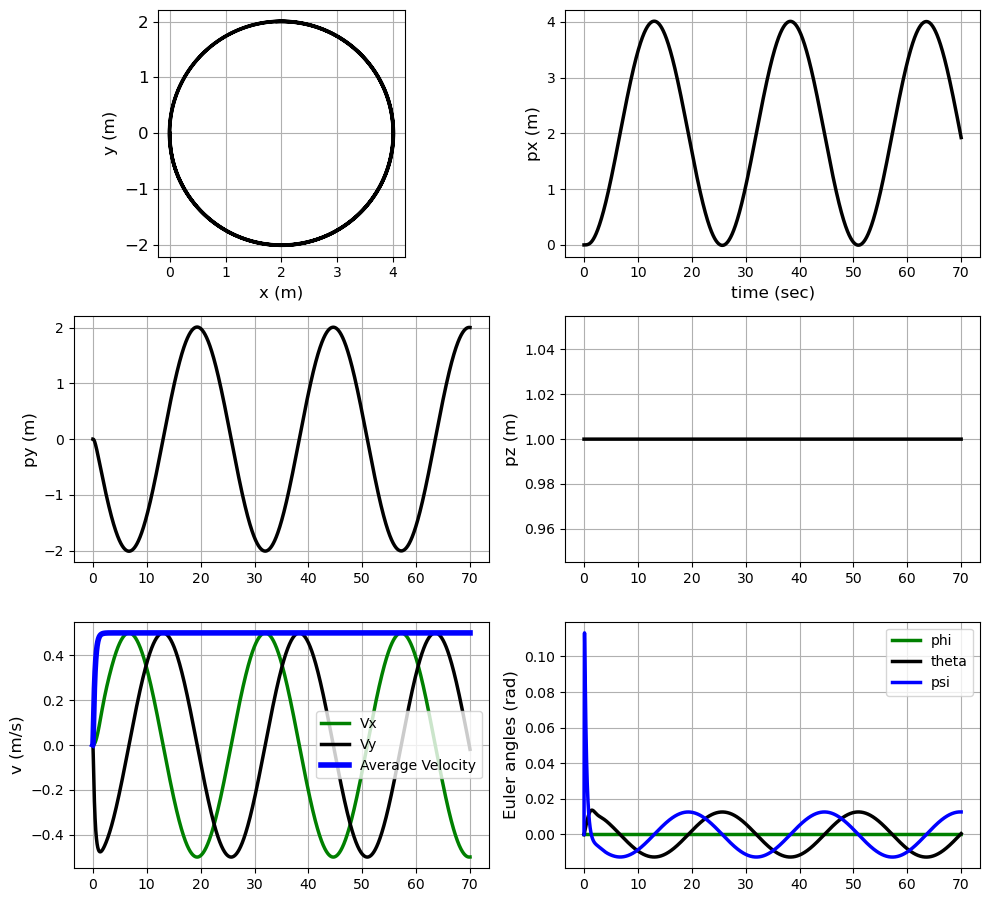

In [ ]:
fig2 = plt.figure(figsize=(10, 15),tight_layout = True)

px = []
py = []
pz = []

psi = []
phi = []
theta = []

vx = []
vy = []
vz = []

for i in range(0,len(times2)):
  px.append(data2[i][0])
  py.append(data2[i][1])
  pz.append(data2[i][2])

  psi.append(data2[i][5])
  phi.append(data2[i][3])
  theta.append(data2[i][4])

  vx.append(data2[i][6])
  vy.append(data2[i][7])
  vz.append(data2[i][8])

v_av = []

for i in range(0,len(vx)):
  v = np.sqrt(vx[i]**2+vy[i]**2+vz[i]**2)
  v_av.append(v)

# Create a plot of position y versus time
ax1 = fig2.add_subplot(521)
ax1.plot(px, py, c='k', lw=2.5, label="")
ax1.set_ylabel("y (m)", fontsize=12)
ax1.set_xlabel("x (m)", fontsize=12)
ax1.set_aspect('equal', 'box')
ax1.tick_params(axis='y', labelsize=12)
ax1.set_title("", fontsize=14)
ax1.grid()


# Create a plot of position z versus time
ax1 = fig2.add_subplot(522)
ax1.plot(times2, px, c='k', lw=2.5, label="")
ax1.set_xlabel("time (sec)", fontsize=12)
ax1.set_ylabel("px (m)", fontsize=12)
ax1.set_title("", fontsize=14)
ax1.grid()

# Create a plot of position x versus time
ax2 = fig2.add_subplot(523)
ax2.plot(times2, py, c='k', lw=2.5, label="")
ax1.set_xlabel("time (sec)", fontsize=12)
ax2.set_ylabel("py (m)", fontsize=12)
ax2.set_title("", fontsize=14)
ax2.grid()

ax3 = fig2.add_subplot(524)
ax3.plot(times2, pz, c='k', lw=2.5, label="")
ax1.set_xlabel("time (sec)", fontsize=12)
ax3.set_ylabel("pz (m)", fontsize=12)
ax3.set_title("", fontsize=14)
ax3.grid()

# Create a plot of position x versus time
ax4 = fig2.add_subplot(525)
ax1.set_xlabel("time (sec)", fontsize=12)
ax4.plot(times2, vx, c='g', lw=2.5, label="Vx")
ax4.plot(times2, vy, c='k', lw=2.5, label="Vy")
ax4.plot(times2, v_av, c='b', lw=4, label="Average Velocity")
ax4.set_ylabel("v (m/s)", fontsize=12)
ax4.set_title("", fontsize=14)
ax4.legend()
ax4.grid()

# Create a plot of position x versus time
ax5 = fig2.add_subplot(526)
ax1.set_xlabel("time (sec)", fontsize=12)
ax5.plot(times2, phi, c='g', lw=2.5, label="phi")
ax5.plot(times2,theta, c='k', lw=2.5, label="theta")
ax5.plot(times2, psi, c='b', lw=2.5, label="psi")
ax5.set_ylabel("Euler angles (rad)", fontsize=12)
ax5.set_title("", fontsize=14)
ax5.legend()
ax5.grid()



Text(0.5, 0.92, 'Trajectory of drone for 2nd performance requirement')

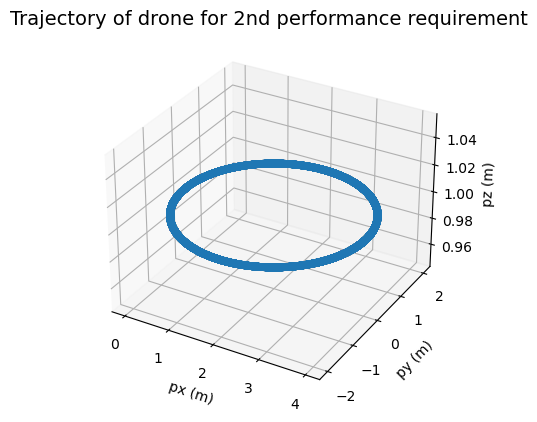

In [ ]:
ax20 = plt.axes(projection='3d')
ax20.scatter3D(px, py, pz);
ax20.set_xlabel('px (m)')
ax20.set_ylabel('py (m)')
ax20.set_zlabel('pz (m)');
ax20.set_title("Trajectory of drone for 2nd performance requirement", fontsize=14)

In [ ]:
# calculate motor torques

# Don't run this code block or the one below again and again. It takes quite a bit of time to make torque calculations.
# Instead, run the code block below that has the pickle module imported. For that to work, one has to download
# the dictionaries named omega2_list and torque2_list from github and have them in the same folder as this file.
""""
omega2_list = []

omega1,omega2,omega3,omega4 = symbols('omega1,omega2,omega3,omega4')

for i in range(1,29999):
  tau_x_exp = k*(omega3**2-omega1**2)*Larm*sin(np.pi/2)
  tau_y_exp = k*(omega4**2-omega2**2)*Larm*sin(np.pi/2)
  tau_z_exp = 2*Iprop*(omega2**2+omega4**2-omega1**2-omega3**2)
  f_z_exp = k*(omega1**2+omega2**2+omega3**2+omega4**2)

  eq1 = Eq(tau_x_exp, input2[i][0])
  eq2 = Eq(tau_y_exp, input2[i][1])
  eq3 = Eq(tau_z_exp, input2[i][2])
  eq4 = Eq(f_z_exp, input2[i][3])

  sol = solve((eq1,eq2,eq3,eq4),(omega1,omega2,omega3,omega4))

  omegas = np.array([sol[5][0],sol[5][1],sol[5][2],sol[5][3]])

  omega2_list.append(omegas)

In [ ]:
""""
torque2_list = []

for i in range(0,len(omega2_list)-1):
  omega0 = omega2_list[i]
  omega1 = omega2_list[i+1]
  delta = omega1-omega0
  torque = []
  for w in delta:
    torque.append(w/dt*k)
  torque2_list.append(torque)

In [ ]:
import pickle

with open('omega2_list.pickle', 'rb') as f:
    omega2_list = pickle.load(f)

with open('torque2_list.pickle', 'rb') as f:
    torque2_list = pickle.load(f)

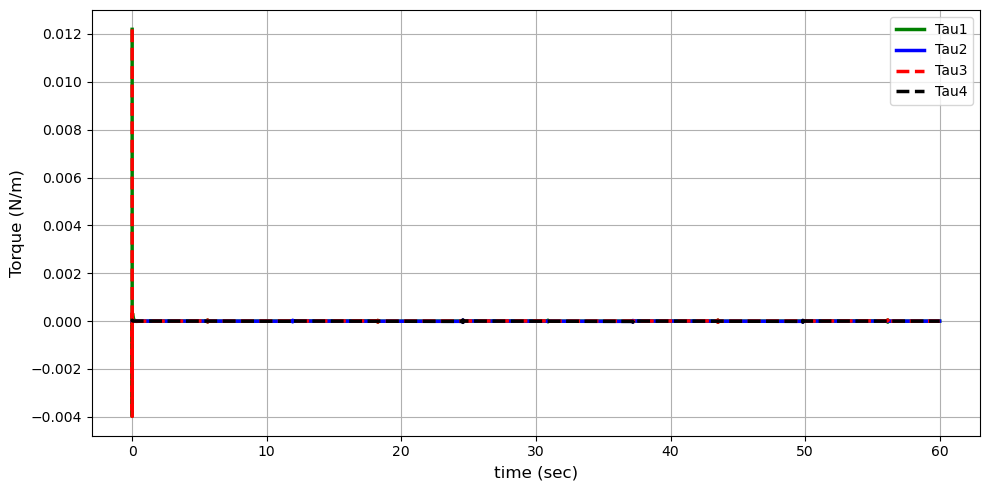

In [ ]:
n = len(torque2_list)
times_torque2 = []
tau1 = []
tau2 = []
tau3 = []
tau4 = []
for i in range(0,n):
    times_torque2.append(i*dt)
    tau1.append(re(torque2_list[i][0])+im(torque2_list[i][0]))
    tau2.append(re(torque2_list[i][1])+im(torque2_list[i][1]))
    tau3.append(re(torque2_list[i][2])+im(torque2_list[i][2]))
    tau4.append(re(torque2_list[i][3])+im(torque2_list[i][3]))

fig2t = plt.figure(figsize=(10, 5),tight_layout = True)

# Create a plot of position x versus time
ax1 = fig2t.add_subplot(111)
ax1.set_xlabel("time (sec)", fontsize=12)
ax1.plot(times_torque2, tau1, 'g-', lw=2.5, label="Tau1")
ax1.plot(times_torque2, tau2, 'b-', lw=2.5, label="Tau2")
ax1.plot(times_torque2, tau3, 'r--', lw=2.5, label="Tau3")
ax1.plot(times_torque2, tau4, 'k--', lw=2.5, label="Tau4")
ax1.set_ylabel("Torque (N/m)", fontsize=12)
ax1.set_title("", fontsize=14)
ax1.legend()
ax1.grid()

In [ ]:
# simulate req 3

A = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 9.81, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, -9.81, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
B = np.array([[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.8996960486322187], [834.009164667334, 0.0, 0.0, 0.0], [0.0, 834.009164667334, 0.0, 0.0], [0.0, 0.0, 1939.67937618578, 0.0]])
K = np.array([[4.435587211786495e-14, -2.2360679774997787, 1.3401926582613883e-14, -2.4435735624435287e-14, 2.583350913751903e-14, 9.314032240854745, 3.1255145487644625e-14, -2.4486805715160624, 4.699366249594955e-15, 0.3497650115289007, 6.054750765243954e-16, 2.315566630417427e-16], [2.2360679774998187, -1.0142593896072878e-14, 3.713841689289151e-16, -5.429710723771213e-15, 9.31403224085465, 1.3955728060129932e-14, 2.4486805715160798, -6.309226602073469e-15, 7.545576543032803e-16, 6.054750765243954e-16, 0.3497650115288979, 1.5872381938975564e-16], [-1.7496913556837234e-14, -2.855246893851847e-14, 4.942002535553229e-14, 8.36660026534082, 5.080021560062136e-14, 1.8114123192651023e-14, -2.273046318830765e-14, -1.6139427983076046e-14, 1.0364038100037225e-14, 5.385380673839738e-16, 3.691486041433955e-16, 0.3295857807118174], [1.0096896735799777e-15, -2.8533698742563314e-15, 2.2360679774997867, -9.266788089449091e-16, 1.3864290208236739e-17, 2.6239371118604783e-15, 7.383992661380918e-16, -1.8462685035169224e-15, 2.025865831369831, 1.0704159946482191e-17, 1.7187223535090264e-18, 1.0150400353913308e-17]])

A2 = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.123233995736766e-17, -1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 6.123233995736766e-17, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 9.81, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, -9.81, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
B2 = np.array([[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.8996960486322187], [834.009164667334, 0.0, 0.0, 0.0], [0.0, 834.009164667334, 0.0, 0.0], [0.0, 0.0, 1939.67937618578, 0.0]])
K2 = np.array([[1.2702207818348305e-15, 6.144953550962403e-15, -9.111559955044644e-15, 1.8569463401975963e-14, -2.13040557416551e-14, 8.366600265340796, 1.0785578940313225e-14, -4.374255403005442e-15, -4.571781127697448e-15, 0.34650190350182863, -1.2739010673772006e-15, 3.792302841975943e-17], [-1.8004586750924698e-14, 2.2360679774998706, -2.640590421090907e-15, 1.4603329858510084e-14, 9.314032240854704, -3.533885780387316e-14, 2.44868057151611, 1.0502001268864337e-14, -1.99792960761663e-15, -1.2739010673772006e-15, 0.3497650115289007, -9.662970368346333e-17], [2.2360679774997836, -5.454650431107275e-15, 5.136215977872847e-14, 9.265514742350303, 2.265532956516151e-16, -4.575234166110528e-15, -3.727346025700489e-15, -2.4441601043680126, 1.4339553003330063e-14, 8.819869040366636e-17, -2.247345128833428e-16, 0.33098890613850546], [4.020981342248764e-16, 2.5487833227365287e-15, 2.23606797749979, -8.91139175538013e-17, 3.1956156675516525e-16, 2.5162710473630435e-16, -2.357317597704402e-17, -2.3481812863178163e-16, 2.0258658313698295, -1.0413548089681274e-17, -4.5508600406669965e-18, 1.404396649983729e-17]])


# simulation data set
data3 = []
times3 = []
vel_list1 = []
vel_list2 = []
input3 = []

dt = 0.002 # simulation time steps

#Adam work below
steady_state_w = omega_m_eq #i fomthink this is the right omega we need
    # The above would be whichever value of w that satisfied hovering condition

p = 1

alpha_rad = 2*Iprop*(4*p)/Izz
    # the above is the resultant body angular acceleration about z from the FIXED CHANGE IN MOTOR W

    #I will use the dt defined previously
    #dt_arbitrary = 10**(-7) #seconds

total_time = 0 #seconds
angle = 0 #This would be the yaw angle itself, state val 1
instantaneous_w = 0 #This would be the induced yaw angle speed, state val 2
time_steps = 0 #just for convenience and tracking

while angle < np.pi/2:  # ADAM CHANGED THIS 4:35 PM FROM 45 to PI/2
    instantaneous_w += alpha_rad * dt
    angle += instantaneous_w * dt
    total_time += dt
    time_steps += 1

tracker = 0
#print(time_steps)
#Adam work above


x_test = np.zeros(12) # initial state
xdes = np.zeros(12)
data3.append([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])

x_mem = x_test
x_test2_list = []
x_test2_index = 0

step = 0
t_s0=0
t_s2=0
t_s5=0

for i in range(0,75000):
  key = str(i)
  t = i*dt
  times3.append(t)

  pos = x_test[0:3]
  vel = x_test[6:9]
  orient = x_test[3:6]
  angular = x_test[9:12]

#########

  if step == 0:

    pos_goal = np.array([0,0,1])

    dist = pos_goal - pos
    u_dist = dist / np.linalg.norm(dist)

    orient_des = np.zeros(3)
    angular_des = np.zeros(3)

    if np.linalg.norm(dist) > 0.1:
        pos_des = pos + 0.01 * u_dist
        vel_des = 0.05 * u_dist
    elif np.linalg.norm(dist) > 0.075:
        pos_des = pos +  0.01 * u_dist
        vel_des = 0.0275 * u_dist
    elif np.linalg.norm(dist) > 0.05:
        pos_des = pos +  0.01 * u_dist
        vel_des = 0.005 * u_dist
    elif np.linalg.norm(dist) > 0.03:
        pos_des = pos +  0.01 * u_dist
        vel_des = 0.003 * u_dist
    elif np.linalg.norm(dist) > 0.01:
        pos_des = pos +  0.01 * u_dist
        vel_des = 0.0007 * u_dist
    else:
        pos_des = pos_goal
        vel_des = 0 * u_dist
        t_s0 += dt


    xdes = np.concatenate((pos_des,orient_des,vel_des,angular_des))
    xdot = A @ x_test - B @ K @ (x_test-xdes)

#########

  if step == 1:

    pos_goal = np.array([5,0,1])

    vel_list1.append(np.linalg.norm(vel))

    dist = pos_goal - pos
    u_dist = dist / np.linalg.norm(dist)

    orient_des = np.zeros(3)
    angular_des = np.zeros(3)

    if np.linalg.norm(dist) > 4.95:
        pos_des = pos + 0.01 * u_dist
        vel_des = 0.1 * u_dist
    elif np.linalg.norm(dist) > 4.9:
        pos_des = pos + 0.01 * u_dist
        vel_des = 0.15 * u_dist
    elif np.linalg.norm(dist) > 4.8:
        pos_des = pos + 0.01 * u_dist
        vel_des = 0.2 * u_dist
    elif np.linalg.norm(dist) > 4.6:
        pos_des = pos + 0.01 * u_dist
        vel_des = 0.4 * u_dist
    elif np.linalg.norm(dist) > 4.4:
        pos_des = pos + 0.01 * u_dist
        vel_des = 0.8 * u_dist
    elif np.linalg.norm(dist) > 4.2:
        pos_des = pos + 0.01 * u_dist
        vel_des = 1 * u_dist
    elif np.linalg.norm(dist) > 2.0:
        pos_des  = pos + 0.01 * u_dist
        vel_des  = 2 * u_dist
    elif np.linalg.norm(dist) > 0.8:
        pos_des = pos + 0.01 * u_dist
        vel_des = 0.8 * u_dist
    elif np.linalg.norm(dist) > 0.6:
        pos_des = pos + 0.01 * u_dist
        vel_des = 0.6 * u_dist
    elif np.linalg.norm(dist) > 0.4:
        pos_des = pos + 0.01 * u_dist
        vel_des = 0.4 * u_dist
    elif np.linalg.norm(dist) > 0.2:
        pos_des = pos + 0.01 * u_dist
        vel_des = 0.2 * u_dist
    elif np.linalg.norm(dist) > 0.1:
        pos_des = pos + 0.01 * u_dist
        vel_des = 0.15 * u_dist
    elif np.linalg.norm(dist) > 0.05:
        pos_des = pos + 0.01 * u_dist
        vel_des = 0.1 * u_dist
    else:
        pos_des = pos_goal
        vel_des = 0 * u_dist
        step = 2

    if vel[0] > 0.88 and vel_des[0] > 1:
        vel_des = vel


    xdes = np.concatenate((pos_des,orient_des,vel_des,angular_des))
    xdot = A @ x_test - B @ K @ (x_test-xdes)

    x_test2_list.append(list(xdot))



#########

  if step == 2:
    xdes = np.array([5.,0.,1.,0.,0.,0.,0.,0.,0.,0.,0.,0.])
    if np.linalg.norm(x_test-xdes) > 0.002:
      xdot = A @ x_test - B @ K @ (x_test-xdes)
    else:
      t_s2 += dt
      xdot = np.zeros(12)

#########

  if step == 3:


    psi_dot = float((x_test[10]*sin(x_test[5])+x_test[11]*cos(x_test[5]))/cos(x_test[4]))

    if tracker < time_steps*sqrt(0.5):
      xdot=np.array([0.,0.,0.,psi_dot,0.,0.,0.,0.,0.,0.,0.,alpha_rad])
      u_list = np.array([0,0,alpha_rad,0])
      tracker += 1
    elif tracker < time_steps*sqrt(0.5)*2:
      xdot=np.array([0.,0.,0.,psi_dot,0.,0.,0.,0.,0.,0.,0.,-alpha_rad])
      u_list = np.array([0,0,-alpha_rad,0])
      tracker += 1
    else:
      step = 4

    input3.append(list(u_list))

#########

  if step == 4:
    if  x_test2_index < len(x_test2_list):
      xdot = np.array([-x_test2_list[x_test2_index][1],
                      x_test2_list[x_test2_index][0],
                      x_test2_list[x_test2_index][2],
                      -x_test2_list[x_test2_index][4],
                      x_test2_list[x_test2_index][3],
                      x_test2_list[x_test2_index][5],
                      -x_test2_list[x_test2_index][7],
                      x_test2_list[x_test2_index][6],
                      x_test2_list[x_test2_index][8],
                      -x_test2_list[x_test2_index][10],
                      x_test2_list[x_test2_index][9],
                      x_test2_list[x_test2_index][11]])

      x_test2_index += 1
    else:
      step = 5




#########

  if step == 5:
    xdes = np.array([5.,5.,1.,np.pi/2,0.,0.,0.,0.,0.,0.,0.,0.])
    if np.linalg.norm(x_test-xdes) > 0.002:
      xdot = A @ x_test - B @ K @ (x_test-xdes)
    else:
      t_s5 += dt
      xdot = np.zeros(12)



#########


  if step == 6:

    pos_goal = np.array([5,5,0])

    dist = pos_goal - pos
    u_dist = dist / np.linalg.norm(dist)

    orient_des = np.array([np.pi/2,0,0])
    angular_des = np.zeros(3)

    if np.linalg.norm(dist) > 0.1:
        pos_des = pos + 0.01 * u_dist
        vel_des = 0.05 * u_dist
    elif np.linalg.norm(dist) > 0.075:
        pos_des = pos +  0.01 * u_dist
        vel_des = 0.0275 * u_dist
    elif np.linalg.norm(dist) > 0.05:
        pos_des = pos +  0.01 * u_dist
        vel_des = 0.005 * u_dist
    elif np.linalg.norm(dist) > 0.03:
        pos_des = pos +  0.01 * u_dist
        vel_des = 0.003 * u_dist
    elif np.linalg.norm(dist) > 0.01:
        pos_des = pos +  0.01 * u_dist
        vel_des = 0.0007 * u_dist
    else:
        pos_des = pos_goal
        vel_des = 0 * u_dist
        step = 7

    if np.abs(vel[2]) > 0.01:
        vel_des = np.zeros(3)


    xdes = np.concatenate((pos_des,orient_des,vel_des,angular_des))
    xdot = A @ x_test - B @ K @ (x_test-xdes)


#########

  if step == 7:
    xdes = np.array([5.,5.,0.,np.pi/2,0.,0.,0.,0.,0.,0.,0.,0.])
    xdot = A @ x_test - B @ K @ (x_test-xdes)

#########

  if not step == 3:
    u_list = -K @ (x_test-xdes)
    input3.append(list(u_list))



  x_test += xdot*dt
  xdot = np.zeros(12)

  data3.append(list(x_test))




  if t_s0 > 0.5:
       step = 1
       t_s0 = 0
  if t_s2 > 0.5:
       step = 3
       t_s2 = 0
  if t_s5 > 0.5:
      step = 6
      t_s5 = 0


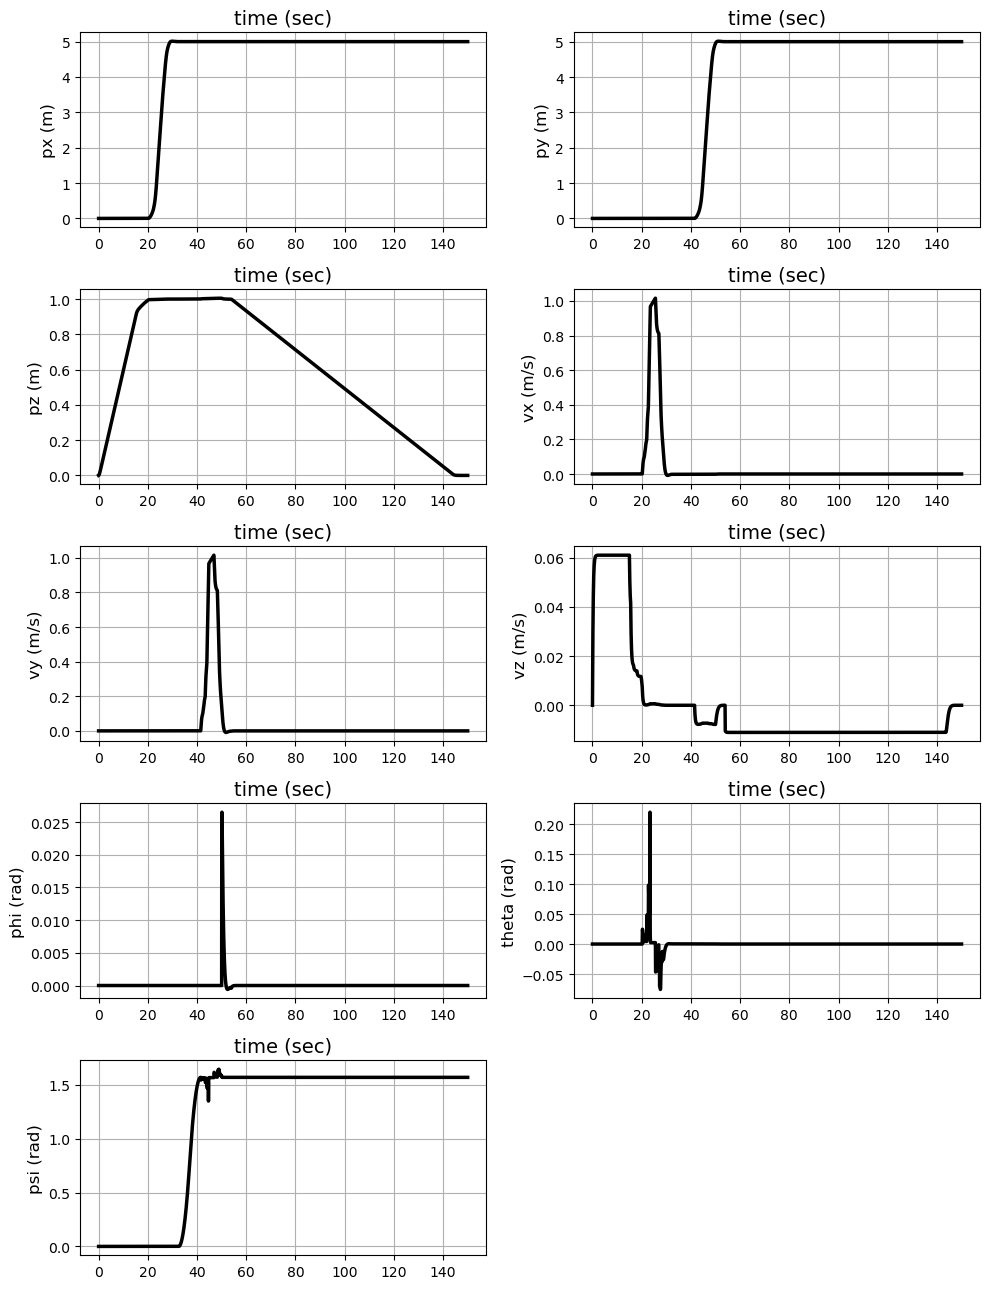

In [ ]:
fig3 = plt.figure(figsize=(10, 13),tight_layout = True)

px = []
for i in range(0,len(times3)):
  px.append(data3[i][0])

py = []
for i in range(0,len(times3)):
  py.append(data3[i][1])

pz = []
for i in range(0,len(times3)):
  pz.append(data3[i][2])


vx = []
for i in range(0,len(times3)):
  vx.append(data3[i][6])

vy = []
for i in range(0,len(times3)):
  vy.append(data3[i][7])

vz = []
for i in range(0,len(times3)):
  vz.append(data3[i][8])

psi = []
for i in range(0,len(times3)):
  psi.append(data3[i][3])

phi = []
for i in range(0,len(times3)):
  phi.append(data3[i][5])

theta = []
for i in range(0,len(times3)):
  theta.append(data3[i][4])

omegaz_list = []
for i in range(0,len(times3)):
  omegaz_list.append(data3[i][11])


# Create a plot of position z versus time
ax1 = fig3.add_subplot(521)
ax1.plot(times3, px, c='k', lw=2.5, label="")
ax1.set_ylabel("px (m)", fontsize=12)
ax1.set_title("time (sec)", fontsize=14)
ax1.grid()

# Create a plot of position x versus time
ax2 = fig3.add_subplot(522)
ax2.plot(times3, py, c='k', lw=2.5, label="")
ax2.set_ylabel("py (m)", fontsize=12)
ax2.set_title("time (sec)", fontsize=14)
ax2.grid()

ax3 = fig3.add_subplot(523)
ax3.plot(times3, pz, c='k', lw=2.5, label="")
ax3.set_ylabel("pz (m)", fontsize=12)
ax3.set_title("time (sec)", fontsize=14)
ax3.grid()

# Create a plot of position x versus time
ax4 = fig3.add_subplot(524)
ax4.plot(times3, vx, c='k', lw=2.5, label="")
ax4.set_ylabel("vx (m/s)", fontsize=12)
ax4.set_title("time (sec)", fontsize=14)
ax4.grid()

# Create a plot of position x versus time
ax5 = fig3.add_subplot(525)
ax5.plot(times3, vy, c='k', lw=2.5, label="")
ax5.set_ylabel("vy (m/s)", fontsize=12)
ax5.set_title("time (sec)", fontsize=14)
ax5.grid()

# Create a plot of position x versus time
ax5 = fig3.add_subplot(526)
ax5.plot(times3, vz, c='k', lw=2.5, label="")
ax5.set_ylabel("vz (m/s)", fontsize=12)
ax5.set_title("time (sec)", fontsize=14)
ax5.grid()

# Create a plot of position x versus time
ax6 = fig3.add_subplot(527)
ax6.plot(times3, phi, c='k', lw=2.5, label="")
ax6.set_ylabel("phi (rad)", fontsize=12)
ax6.set_title("time (sec)", fontsize=14)
ax6.grid()

# Create a plot of position x versus time
ax7 = fig3.add_subplot(528)
ax7.plot(times3,theta, c='k', lw=2.5, label="")
ax7.set_ylabel("theta (rad)", fontsize=12)
ax7.set_title("time (sec)", fontsize=14)
ax7.grid()

# Create a plot of position x versus time
ax8 = fig3.add_subplot(529)
ax8.plot(times3, psi, c='k', lw=2.5, label="")
ax8.set_ylabel("psi (rad)", fontsize=12)
ax8.set_title("time (sec)", fontsize=14)
ax8.grid()


Text(0.5, 0.92, 'Trajectory of drone for 3rd performance requirement')

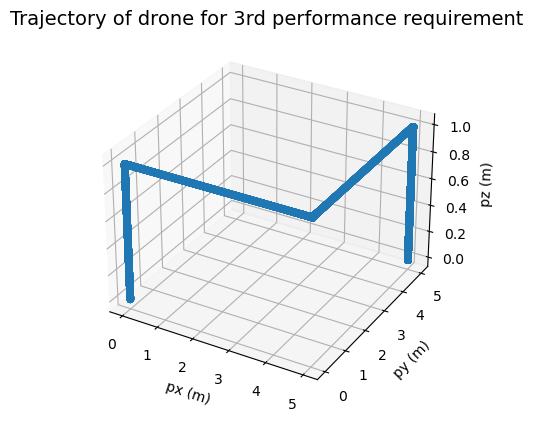

In [ ]:
ax30 = plt.axes(projection='3d')
ax30.scatter3D(px, py, pz);
ax30.set_xlabel('px (m)')
ax30.set_ylabel('py (m)')
ax30.set_zlabel('pz (m)');
ax30.set_title("Trajectory of drone for 3rd performance requirement", fontsize=14)

In [ ]:
# calculate motor torques

# Don't run this code block or the one below again and again. It takes quite a bit of time to make torque calculations.
# Instead, run the code block below that has the pickle module imported. For that to work, one has to download
# the dictionaries named omega3_list and torque3_list from github and have them in the same folder as this file.
""""
omega3_list = []

omega1,omega2,omega3,omega4 = symbols('omega1,omega2,omega3,omega4')

for i in range(1,74999):
  tau_x_exp = k*(omega3**2-omega1**2)*Larm*sin(np.pi/2)
  tau_y_exp = k*(omega4**2-omega2**2)*Larm*sin(np.pi/2)
  tau_z_exp = 2*Iprop*(omega2**2+omega4**2-omega1**2-omega3**2)
  f_z_exp = k*(omega1**2+omega2**2+omega3**2+omega4**2)

  eq1 = Eq(tau_x_exp, input3[i][0])
  eq2 = Eq(tau_y_exp, input3[i][1])
  eq3 = Eq(tau_z_exp, input3[i][2])
  eq4 = Eq(f_z_exp, input3[i][3])

  sol = solve((eq1,eq2,eq3,eq4),(omega1,omega2,omega3,omega4))

  omegas = np.array([sol[5][0],sol[5][1],sol[5][2],sol[5][3]])

  omega3_list.append(omegas)

In [ ]:
""""
torque3_list = []

for i in range(0,len(omega3_list)-1):
  omega0 = omega3_list[i]
  omega1 = omega3_list[i+1]
  delta = omega1-omega0
  torque = []
  for w in delta:
    torque.append(w/dt*k)
  torque3_list.append(torque)

In [ ]:
import pickle

with open('omega3_list.pickle', 'rb') as f:
    omega3_list = pickle.load(f)

with open('torque3_list.pickle', 'rb') as f:
    torque3_list = pickle.load(f)

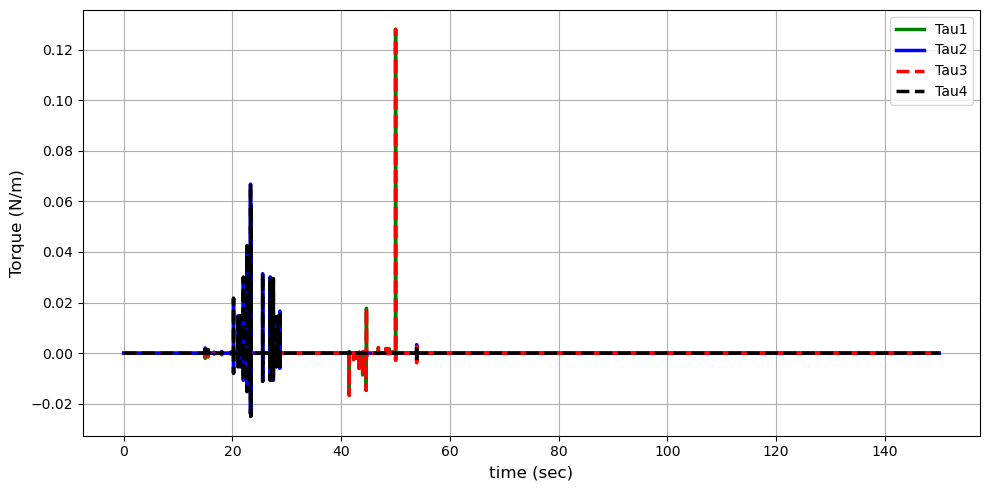

In [ ]:
n = len(torque3_list)
times_torque3 = []
tau1 = []
tau2 = []
tau3 = []
tau4 = []
for i in range(0,n):
    times_torque3.append(i*dt)
    tau1.append(re(torque3_list[i][0])+im(torque3_list[i][0]))
    tau2.append(re(torque3_list[i][1])+im(torque3_list[i][1]))
    tau3.append(re(torque3_list[i][2])+im(torque3_list[i][2]))
    tau4.append(re(torque3_list[i][3])+im(torque3_list[i][3]))

fig3t = plt.figure(figsize=(10, 5),tight_layout = True)

ax1 = fig3t.add_subplot(111)
ax1.set_xlabel("time (sec)", fontsize=12)
ax1.plot(times_torque3, tau1, 'g-', lw=2.5, label="Tau1")
ax1.plot(times_torque3, tau2, 'b-', lw=2.5, label="Tau2")
ax1.plot(times_torque3, tau3, 'r--', lw=2.5, label="Tau3")
ax1.plot(times_torque3, tau4, 'k--', lw=2.5, label="Tau4")
ax1.set_ylabel("Torque (N/m)", fontsize=12)
ax1.set_title("", fontsize=14)
ax1.legend()
ax1.grid()